# DDMCK for Positioning, Networking, Signature Management and EW 

This work considers a cross-domain problem of controlling GPS and radios across multiple vehicles with consideration across different domains of position accuracy, networking topology control, signature control and GPS jamming (EW).

We will consider a hierarchical design where each vehicle's device control decisions are made on multiple (2 for now) layers. 

This is an attempt to integrate our previous works captured in notebooks consensus_based_task_allocation (3).ipynb, LPD_auction.ipynb (and alternative method by Ben on spanning tree LPD work with UoA), Power Control (2).ipynb (and alternative regret based optimisation method by Behzad using Projected Gradient LPD.ipynb) and Adaptive MIP MPC  cvxpy.ipynb.




## The Structure  

### Shared Repository 

https://gitlab.com/BehZamani/AVSPythonNotebooks.git
Let me know if you don't have access and I will add you to the project

### Dependencies:

Platform : Ubuntu 16.04 (or 18.04 LTS but not tested)

Environment/dependencies management: Anaconda https://www.anaconda.com/download/#linux

Environment: Python 3 (installed by Anaconda)

Editor: Jupyter Notebooks (installed by Anaconda)

### Simulation utilities: 

The multi-vehicle scenario which includes network topology, location of nodes, enemy nodes, radio signature representation, GPS degradations and jamming spaces is going to be created using

-Agent based code for modeling, data logging and visualisation

MESA: http://mesa.readthedocs.io/en/latest/index.html

-Network utilities such as random topology creation, location assignment, network metric/data methods such as spanning tree and network connectivity methods, visualisation etc

Networkx: https://networkx.github.io/

### Decision Making/Control design:
CVXPY: http://www.cvxpy.org/index.html (Need to decide whether we go to version 1.0 or stay with 0.4.11. There is nothing wrong with version 1.0 it is just annoying that they have made some changes in the syntax and hence the errors. I think the version 1.0 would be a better longer term bet)

-mixed integer programming for modelling the GPS configuration problem (a version is done in Adaptive MIP MPC  cvxpy.ipynb notebook)

-Model predictive control (MPC) design for online (iterative) optimisation

-Multi-layer optimisation based on context considerations, distributed vehicle optimisation (a version is done in 
Power Control (2).ipynb notebook)

-regret based (projected gradient) optimisation (now done in Projected Gradient LPD.ipynb) 

### Distributed Decision Making design:

-consensus based problem synchronisation between vehicles (a version is done in consensus_based_task_allocation (3).ipynb notebook)

-auction based decision making between vehicles (a version is done in LPD_auction.ipynb notebook)

-dual decomposition based decision making between vehicles (not done yet)


# The Scenario

Here is a simple one but we can make it arbitrarily complicated if we like, I would argue for starting simple.


A 2D space consisting of a number of blue and red vehicles is considered. The red vehicles are either stationary based on random locations generated by the scenario or are moving based on some random generator. 

A RF model based on squared distance determines the reach of communication signals between vehicles. The communication mission of blue vehicles is to minimise their signature (their reach to red vehicles) and to achieve a flexible but connected blue-network topology.

GPS devices on each vehicle are subject to jamming and degradation based on environment effects either based on location (proximity to red vehicles) or some random generators. GPS accuracy and jamming is modelled using number of satellites seen and the jamming flag as was done in the Rosa prototype.      

The multi-vehicle distributed problem is to utilise distributed decision making to decide transmission power of radios in order to achieve the connectivity/signature management (let's call it CSM or something).

The low level internal to vehicles problem is to configure the GPS based on accuracy requirements of the CSM, the degradation/jamming context and the context predictor (future work). Likewise, the low level internal to vehicle's radio control problem is to adjust transmission power based on the connectivity requirement of CSM and current accuracy of GPS and own and other vehicles (because accuracy of positioning determines robustness of this decision). 

The following diagram provides a functional partioning of the code as was discussed on 13/06/2018. Note that they are some indicative roles in the diagrams as well to describe the team work model.


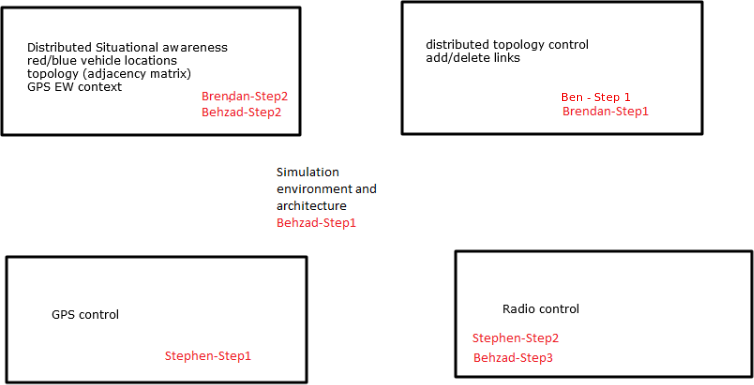


In [1]:
# importing the dependencies

import cvxpy as cvx

import numpy as np
# %matplotlib inline

# # Imports specifically so we can render outputs in Jupyter.
# from JSAnimation.IPython_display import display_animation
# from matplotlib import animation
# from IPython.display import display


# %matplotlib nbagg

import matplotlib.pyplot as plt
from matplotlib.patches import Circle 

import random

import time

from mesa.space import MultiGrid
from mesa import Agent, Model
from mesa.time import SimultaneousActivation

from mesa.datacollection import DataCollector


# a lib for network generation and other operations
import networkx as nx



In [2]:
# TODO 1: wrapper for the asynchronous distributed topology control (Zavlanus Pappas paper 2008) using
#          1- Token consensus algorithm for syncronised action readiness among agents
#          2- Laplacian Consensus algorithm for common operating picture (SA) of topology for each agent
#          2- Auction + consensus algorithm for decision to cut edges without losing connectivity

# Note that distributed situational awareness is excersised to some extend here (not fully) we might have to 
#   see if and how we can seperate these to achieve a modular design

class DistributedTopologyController():
    
    # constructor and attributes
    def __init__(self, initial_laplacian):
        
        # this is an example of internal controller state (data)
        self.laplacian = initial_laplacian
                
        # this is an example of internal controller state (status),
        # This is a standard status state for controller objects that needs to be modified based on *_control method
        self.status = 'Running' # or 'Success' or 'Failure'
        
        # this is an example of internal controller state (time)
        self.iteration = 0 

        
        
    def topology_control(self):
        
        # steps 1-3 as described above
        # Brendan, needs your refactored code here (just the algorithm the MESA stuff is done by simulation)
        self.laplacian = self.laplacian
    

In [3]:
# TODO 1: wrapper for the GPS controller in Adaptive GPS control file needs to be class that has the following method

class GPSController ():
    
    
    
    # constructor
    def __init__(self, initial_maskin_angle, initial_power_switch):
                
        # this is an example of internal controller state (data)
        self.maskingAngle = initial_maskin_angle
        self.powerSwitch =  initial_power_switch
        
        
        # this is an example of internal controller state (status)
        self.status = 'Running' # or 'Success' or 'Failure'
        
        # this is an example of internal controller state (time)
        self.iteration = 0
        
        
            

    def GPS_control(required_accuracy, jam_state, num_sats):
        
        # Stephen needs you refactored code here and we need to add gps_accuracy as a mechanism of QoS feedback to other blocks
        # we need to discuss and make sense out of this
        
        gps_accuracy = 0;
        return gps_accuracy


In [4]:
# This module is the radio power decision maker method, assuming that location of own vehicle, neighboring vehicles and 
#    red vehicles is known. These are decided by the DistributedTopologyController object. 

# TODO 1: Needs to be changed so that it can accept not just exact locations but estimates and accuracy of location
#          Probabely as a class in it's own that uses the following method
# TODO 2: Needs to be changed so that it can produce not just transmission power decision but also a confidence indicator

class RadioController ():
    
    # constructor
    def __init__(self, initial_power):
                    
            
        # this is an example of internal controller state (data)
        self.power = initial_power  
        
        
        # this is an example of internal controller state (status)
        self.status = 'Running' # or 'Success' or 'Failure'
        
        # this is an example of internal controller state (time)
        self.iteration = 0
        
        self.staged_power = self.power
        
          
        
        
        
    # we write the controller in a function form so that we can easily reuse the code later on
    def power_control(self, l_i, l_b_list, l_e_list):
            
        new_power = np.random.rand(1)  
        self.staged_power = new_power


In [5]:
# the Simulation classes including vehicles and the environment

  

class BlueVehicle(Agent):
    
    def __init__(self, unique_id, model):
        # based on super class Agent provided by mesa initialse   
        super().__init__(unique_id, model)
        
        self.status = 'Running' # or 'Success' or 'Failure'
        
        # the list of enemy locations is the same for each blue vehicle
        self.l_e_list = np.array([np.array(x) for x in self.model.pos_red.values()])
        
        # position of own vehicle
        self.l_i = self.model.pos_blue[unique_id]
        
        # list of neighbour vehicle locations 
        self.l_b_list = []

        # the list of neighbours that vehicle needs to have (according to the network graph)
        self.neigh = nx.all_neighbors(self.model.topology_blue, unique_id)
            
        for nei in self.neigh:
            self.l_b_list.append (self.model.pos_blue[nei])
        

        
        # initialise the radio power based on what the simulation (model) has
        self.radio_controller = RadioController(model.radio_power_all[unique_id])
        
        

    def step(self):
        
        # The agent's turn here is for things like pulling information from neighbours
        # either for auction or gossip (consensus) based on state information of current time step.
        # this step will stage the control and algorithmic actions decisions that will 
        # change the state of the agent but that change is not applied and only reflected in the state of
        # the agent after running the advance method. Read the MESA mannual for SimultaneousActivation.
            
        self.radio_controller.power_control(self.l_i, self.l_b_list, self.l_e_list)
        
                
    
    def advance(self):
        # The agent's staged changes will be applied to their state now
        # See method step() for more info.
            
        self.power = self.staged_power
    
    
    
    
    
    
class Simulation(Model):
    
    def __init__(self, G_blue, pos_blue, G_red, pos_red, radio_power_all, GPS_angle_all, GPS_power_all, GPS_jam_all, GPS_sat_all):
        
        # initialising the network topology 
        self.topology_blue = G_blue
        self.topology_red = G_red
        
        # initialising the agents locations
        self.pos_blue = pos_blue
        self.pos_red = pos_red
        
       
        # initialising the agent activation stepping method (simultaneous, random, etc) 
        self.schedule = SimultaneousActivation(self)
        
        # number of blue agents (derived from the toplogy)
        self.num_blue_agents = np.shape(self.topology_blue)[0]
        
        # initial vector of all blue agent radio powers
        self.radio_power_all = radio_power_all
        
        # initial vector of all blue agent GPS sky angles
        self.GPS_angle_all = GPS_angle_all
        
        # initial vector of all blue agent GPS power state (on or off)
        self.GPS_power_all = GPS_power_all
        
        # initial vector of all blue agent GPS jam state (on or off)
        self.GPS_jam_all = GPS_jam_all
        
        # initial vector of all blue agent GPS num of sats state 
        self.GPS_sat_all = GPS_sat_all
        
        
        # Create Blue Vehicle Agents
        for i in range(self.num_blue_agents):
            a = BlueVehicle(i, self)
            self.schedule.add(a)
        
        # Data collector 
        self.datacollector = DataCollector(
           
        )
        
        # ----------------------------------------------------------------------visualisation graph
        #initial plot of the scenario
        self.fig = plt.figure('scenario')
        
        self.axi = self.fig.add_axes([0,0,1,1])
        
        self.axi.set_aspect('equal')
        
        self.axi.set_xlim(-1, 4)
        
        self.axi.set_ylim(-1, 4)
        
        # drawing the scenario to check the challenge is suitable
        nx.draw_networkx(self.topology_red, self.pos_red, node_color = 'red', ax = self.axi)
        nx.draw_networkx(self.topology_blue, self.pos_blue, node_color = 'blue', ax = self.axi)
        
    
             

    def simulation_step(self):
        '''Advance the model by one step.'''
        
        
        # step 1 evolve things in the environment including the true states of agents (not based on their own actions)
        # step 2 generate sensed version of the environment for agents so that they can decide their actions
        # step 3 get the agents to do their actions and evolve their state based on that
        
        
        
        self.datacollector.collect(self)
        self.schedule.step()
        self.visualise_communications()
        
    def control_step(self):
        for a in self.schedule.agents:
            # do sth
            f=2
    
    
    def visualise_communications(self):   

        # the list of enemy locations is the same for each blue vehicle
        l_e_list = np.array([np.array(x) for x in self.pos_red.values()])

        

        # for each blue vehicle 
        for bl in self.topology_blue.nodes():
            
            
            # figure out the position of that vehicle,
            l_i = self.pos_blue[bl]
        
            l_b_list = []

            # figure out the list of neighbours that that vehicle needs to have (according to the network graph)
            neigh = nx.all_neighbors(self.topology_blue, bl)
            
            for nei in neigh:
                l_b_list.append (self.pos_blue[nei])
            
            #call the powercontroller method
            blue = self.schedule.agents[bl]
            
            
            
            blue.radio_controller.power_control(l_i, l_b_list, l_e_list)
            
            power = blue.radio_controller.power
            

            # plotting the scenario and results
            circle = Circle((l_i[0], l_i[1]), radius = power*.5, color='g', fill=False, clip_on=True)
            


            # ploting the circle

            self.axi.add_patch(circle)
            
            plt.show()
       

   
    

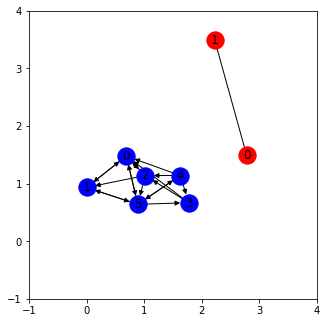

In [6]:
# experiment including power control for all of the blue network nodes
# TODO 1: at the moment only a simple experiment needs a lot of change to create the scenario mentioned before



# Scenario initialisation using networkx
# creating a connected blue graph topology and a sparse (not neccessarily connected) red graph near it but not inside it 


# enemy nodes as a separate graph
G_red = nx.fast_gnp_random_graph(2, .2, seed=None, directed=False)
# random positions in a unit circle centered at indicated
pos_red = nx.spring_layout(G_red, center=(2.5,2.5),  random_state=None)

# blue nodes as a separate graph
# G_blue = nx.connected_watts_strogatz_graph(6, 2, .7, tries=100, seed=None)

# blue nodes as a directed graph
G_blue = nx.binomial_graph(6, .7, seed=None, directed=True) 

# positions based on spring layout
pos_blue=nx.spring_layout(G_blue, center = (1,1))





# instantiating the simulation with the topology that networkx has randomly initiated            

#number of agents
num_agents = np.shape(G_blue)[0]


# initial power of all blue vehicles is zero
radio_power_all = 2 * np.random.rand(num_agents)

# initial vector of all blue agent GPS sky angles
GPS_angle_all = 7 * np.ones(num_agents)

# initial vector of all blue agent GPS power state (on or off)
GPS_power_all = 1 * np.ones(num_agents)# initial vector of all blue agent GPS sky angles
GPS_angle_all = 7 * np.ones(num_agents)

# initial vector of all blue agent GPS power state (on or off)
GPS_power_all = 1 * np.ones(num_agents)


# initial vector of all blue agent GPS jam state (on or off)
GPS_jam_all = 0 * np.ones(num_agents)

# initial vector of all blue agent GPS seen satellites
GPS_sat_all = 4 * np.ones(num_agents)

Sim = Simulation(G_blue, pos_blue,G_red, pos_red, radio_power_all, GPS_angle_all, GPS_power_all, GPS_jam_all, GPS_sat_all)

Sim.visualise_communications()

